# **Lesson 09**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
import os

In [2]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params
%matplotlib inline

# The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city $1$ to the $N^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**Warm suggestion: by using the 1D representation** (but you can work with the representation you prefer or the one you are able to invent) ...

# Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the ordered population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference
- 34 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path in cartesian coordinates

## Solution

To solve the traveling salesman problem, I implemented a **genetic algorithm**: I represented one possible path through all points as an individual, consisting basically in a vector of indices, then I generated a starting population of individuals and I let it evolve through many generations selecting with higher probability the individuals that fitted best the problem.

After having generated a random starting population of size $N$, the fundamental steps of the algorithm are:
1. Ordering of the population with respect to the loss function, defined as the euclidean distance covered by the path:
    $$ L^2(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{M} |\vec{x}_i-\vec{x}_{i+1}|^2 \ , $$
    where $M$ is the individual size, i.e. the number of points along the path.
2. Selection of $N$ individuals picked from the actual population according to the following order-based criterion:
    $$ j= int(N \times r^{\,p}) \ , $$
    where $j$ is the index represented the selected individual, $r$ is a random number sampled uniformly in range $[0,1)$ and $p$ an appropriate power.
3. Perform random mutations and crossover to the current individuals: every mutation (as also the crossover) happens with a fixed probability, significantly higher for the crossover with respect to other mutations. The possible mutations are:
    - crossover
    - elements permutation
    - blocks permutation
    - block shifting
    - block inversion

This three steps define a generation and they are carried on until the desired number of generations is reached.

### Code

To write the genetic algorithm I implemented three classes: `Individual`, `Population` and `TSP`, that are in a certain sense 'nested'.

The `TSP` class can be initialized reading an input file `input.txt` and also another file containing the positions of the points to travel through. The possible input parameters are:

>problem_type           $\hspace{7em}$      \<string\> (circle/square/italy)
><br>cities_number      $\hspace{24mm}$     \<int\>
><br>distance_order     $\hspace{23.4mm}$   \<int\>
><br>selection_power    $\hspace{6em}$      \<int\>
><br>population_size    $\hspace{22mm}$     \<int\>
><br>generations_number $\hspace{15.5mm}$   \<int\>
><br>migration_number   $\hspace{18.6mm}$   \<int\>
><br>mutations_number   $\hspace{18mm}$     \<int\>
><br>crossover_prob     $\hspace{22.4mm}$   \<double\>
><br>pair_permut_prob   $\hspace{19mm}$     \<double\>
><br>block_permut_prob  $\hspace{16.6mm}$   \<double\>
><br>shift_prob         $\hspace{29.5mm}$   \<double\>
><br>inversion_prob     $\hspace{23.4mm}$   \<double\>
><br>highest_temp       $\hspace{25mm}$   \<double\>
><br>lowest_temp        $\hspace{26.4mm}$   \<double\>
><br>
><br>ENDINPUT

- _problem_type_: defines the environment of the problem, where to sample or read the cities. It can be circle/square/italy
- _cities_number_: the length of an individual
- _distance_order_: order of the norm for loss evaluations
- _selection_power_: exponent in the order-based selection
- _population_size_: number of individuals per population
- _generations_number_: number of evolutive steps to do
- _migration_number_: number of evolutionary steps after which two parallel processes can exchange their best individuals
- _mutations_number_: number of possible mutations on the individuals
- _crossover_prob_: probability that crossover will happen (usually over $50\%$)
- _pair_permut_prob_: probability that pair permutation will happen (usually under $10\%$)
- _block_permut_prob_: probability that block permutation will happen (usually under $10\%$)
- _shift_prob_: probability that shift will happen (usually under $10\%$)
- _inversion_prob_: probability that inversion will happen (usually under $10\%$)
- _highest_temp_: highest temperature for parallel tempering
- _lowest_temp_: lowest temperature for parallel tempering

This program generates two types of `.csv` output files: in the first there are stored the loss values for all the individual at every generation, and in the second there are the best paths produced at every generation with their loss.

### Individual Class
---

From the TSP point of view, an individual is a single attempt to visit all the points, labelled with positive integers, once and come back to the starting position. So an object of class `Individual` contains an `arma::uvec index_` where there are stored all the labels of the points (e.g. cities) to visit in a fixed order.

The `Individual` class has several methods, the most important are showed below.

<br>

`Check()`: verifies if every pont of the path is visited only once, i.e. if the elements of `index_` do not appear more then once.
```c++
bool Individual :: Check() {
    bool test = true;
    for(int i=0 ; i<len_-1 ; i++) {
        for(int j=i+1 ; j<len_ ; j++) {
            if(index_(i) == index_(j)) {
                test = false;
                fmt::print("\nERROR! Elements {} and {} are equal!\n", i, j);
            }
            if(!test) break;            // adding breaks to speed the cycles, I only need to know if there is an error or not
        }
        if(!test) break;
    }
    return test;
}
```
<br>

`Permutation()`: applies a permutation of a single element or a block of the `index_` vector.
```c++
void Individual :: Permutation(int blk_length) {
    if(blk_length == 0) blk_length = static_cast<int>(rnd_->Rannyu(1, len_/2));      // static_cast<int> cuts off the decimals, so in this way I obtain an int value in the range [1,2,...,len_/2-1]
    int i1, i2, period_1 = 0, period_2 = 0;
    i1 = static_cast<int>(rnd_->Rannyu(1, len_));      
    do {
        i2 = static_cast<int>(rnd_->Rannyu(1, len_));
    } while(i2 == i1 or max(i1, i2) - min(i1, i2) < blk_length or (max(i1, i2) + blk_length >= len_ and max(i1, i2) + blk_length - len_ + 1 >= min(i1, i2)));
    
    uvec temp = zeros<uvec>(blk_length);
    for(int i=0 ; i<blk_length ; i++) {
        if(i1+i >= len_) period_1 = len_ - 1;
        if(i2+i >= len_) period_2 = len_ - 1;
        temp(i) = index_(i1 + i - period_1);
        index_(i1 + i - period_1) = index_(i2 + i - period_2);
        index_(i2 + i - period_2) = temp(i);
    }

    if(!Check()) {fmt::print("Error in Permutation!\n\n"); exit(1);}
}
```

<br>

`Shift()`: applies a shifting within a subset of the `index_` vector.
```c++
void Individual :: Shift() {
    int blk_length, step, init;
    do {
        blk_length = static_cast<int>(rnd_->Rannyu(2, len_));        // int value in range [2,3,...,len_ - 1]
        step = static_cast<int>(rnd_->Rannyu(1, blk_length));        // int value in range [1,2,...,blk_length - 1]
        if(rnd_->Rannyu() < 0.5) step *= (-1);
        step %= blk_length;
    } while(step == 0);
    init = static_cast<int>(rnd_->Rannyu(1, len_));                  // int value in range [1,2,...,len_ - 1]

    uvec v = zeros<uvec>(blk_length);
    int period = 0;
    for(int i=0 ; i<blk_length ; i++) {
        if(init + i >= len_) period = len_ - 1;
        v(i) = index_(init + i - period);
    }
    v = shift(v, step);
    period = 0;
    for(int i=0 ; i<blk_length ; i++) {
        if(init + i >= len_) period = len_ - 1;
        index_(init + i - period) = v(i);
    }

    if(!Check()) {fmt::print("Error in Shift!\n\n"); exit(1);}
}
```

<br>

`Inversion()`: inverts the order of a subset of the `index_` vector.
```c++
void Individual :: Inversion() {
    int init, blk_length;
    blk_length = static_cast<int>(rnd_->Rannyu(2, len_));    // int value in range [2,3,...,len_ - 1]
    init = static_cast<int>(rnd_->Rannyu(1, len_));          // int value in range [1,2,...,len_ - 1]
    
    uvec v = zeros<uvec>(blk_length);
    int period = 0;
    for(int i=0 ; i<blk_length ; i++) {
        if(init + i >= len_) period = len_ - 1;
        v(i) = index_(init + i - period);
    }
    period = 0;
    for(int i=0 ; i<blk_length ; i++) {
        if(init + i >= len_) period = len_ - 1;
        index_(init + i - period) = v(blk_length - 1 - i);
    }
    
    if(!Check()) {fmt::print("Error in Inversion!\n\n"); exit(1);}
}
```


### Population Class
---

The population is a set of individuals, so the key data member of the `Population` class is an `std::unordered_map<int, Individual> dna_`. I chose a map to have faster access to the elements using their keys. Another important data member is the `arma::mat dist_`: a matrice in which there are stored the distances between all the points of the problem, to avoid computing them at every evolutionary step. Now I will briefly explain the main methods of this class.

<br>

`Distances()`: compute the distances between all points (cities) and store them in `dist_`.
```c++
void Population :: Distances() {
    for(int i=0 ; i<len_ ; i++)
        for(int j=0 ; j<len_ ; j++) {dist_(i,j) = norm(genes_.col(i) - genes_.col(j), norm_);}
}
```

<br>

`Losses()`: reading the distance values, this method assign at every `Individual` of the population its `loss_`.
```c++
void Population :: Losses() {
    double loss;
    for(int i=0 ; i<dim_ ; i++) {
        loss = dist_(dna_.at(i)[len_-1], dna_.at(i)[0]);         // distance between last and first elements, to close the circle
        for(int j=0 ; j<len_-1 ; j++) {
            loss += dist_(dna_.at(i)[j], dna_.at(i)[j+1]);
        }
        dna_.at(i).SetLoss(loss);
    }
}
```

<br>

`Crossover()`: performs the crossover between two elements of the population.
```c++
void Population :: Crossover(int i1) {
    int i2;
    do {i2 = static_cast<int>(rnd_->Rannyu(0, dim_));} while(i2 == i1);      // int value in range [0,1,...,dim_ - 1]

    if(i1 >= dim_ or i1 < 0) {fmt::print("ERROR! Index {} out of population of size {}!\n\n", i1, dim_); return;}
    if(i2 >= dim_ or i2 < 0) {fmt::print("ERROR! Index {} out of population of size {}!\n\n", i2, dim_); return;}

    int cut = static_cast<int>(rnd_->Rannyu(2, len_));           // int value in range [2,3,...,len_ - 1]
    Individual copy1 = dna_.at(i1), copy2 = dna_.at(i2);
    int i_fill = cut, i_check = 1, i = 1;

    // filling the first individual
    while(i_fill < len_) {
        while(copy2[i_check] != copy1[i] and i < cut) {i++;}
        if(i == cut) {
            dna_.at(i1)[i_fill] = copy2[i_check]; 
            i_fill++;
        }
        i_check++;
        i = 1;
    }

    i_fill = cut, i_check = 1, i = 1;
    // filling the second individual
    while(i_fill < len_) {
        while(copy1[i_check] != copy2[i] and i < cut) {i++;}
        if(i == cut) {
            dna_.at(i2)[i_fill] = copy1[i_check]; 
            i_fill++;
        }
        i_check++;
        i = 1;
    }
    
    if(!dna_.at(i1).Check() or !dna_.at(i2).Check()) {fmt::print("Error in Crossover!\n\n"); exit(1);}
}
```

<br>

`Order()`: sets all the keys in the `dna_` map, sorting the individuals by their losses.
```c++
void Population :: Order(bool crescent) {
    Losses();
    vector<pair<int,double>> losses;
    for(int i=0 ; i<dim_ ; i++) {losses.push_back(make_pair(i, dna_.at(i).GetLoss()));}

    if(crescent) {sort(losses.begin(), losses.end(), [](const pair<int, double>& a, const pair<int, double>& b) {return a.second < b.second;});}
    else {sort(losses.begin(), losses.end(), [](const pair<int, double>& a, const pair<int, double>& b) {return a.second > b.second;});}

    unordered_map<int, Individual> sorted_dna;
    for(int i=0 ; i<dim_ ; i++) {sorted_dna[i] = dna_.at(losses[i].first);}

    dna_ = sorted_dna;
}
```

### TSP Class
---

This is the main class of the algorithm, and performs the evolution over a `Population pop_`. Its main methods are shown below.

<br>

`Selection()`: generates a new population selecting with hgher probabilities the individuals with the lowest loss values.
```c++
void TSP :: Selection(int type) {
    int index;
    this->Order();
    unordered_map<int, Individual> dna;
    for(int i=0 ; i<dim_ ; i++) {       // order-based selection
        if(type == 0) {index = static_cast<int>((double)dim_ * (pow(rnd_->Rannyu(), p_)));}
        else {fmt::print("ERROR! Unknown selection type!\n\n"); exit(1);}
        dna[i] = pop_[index];
    }
    pop_.SetDna(dna);
    this->Order();
}

```

<br>

`Mutations()`: loops over all the population and performs mutations and crossover each with its own probability to happen.
```c++
void TSP :: Mutations() {
    Population old;
    double acc;
    for(int j=0 ; j<n_mut_ ; j++) {                 // perform all the mutations ...
        if(temp_i_ != temp_f_) {old = pop_;}
        for(int i=0 ; i<dim_ ; i++) {               // ... on all population elements ...
            if(rnd_->Rannyu() < probs_(j)) {        // ... each one with its own probability
                if(j == 0) {if(dim_ > 1) {pop_.Crossover(i);}}
                else if (j == 1) {pop_[i].Permutation(1);}
                else if (j == 2) {pop_[i].Permutation();}
                else if (j == 3) {pop_[i].Shift();}
                else if (j == 4) {pop_[i].Inversion();}
                else {fmt::print("ERROR! Unknown mutation!\n\n"); exit(1);}
            }
        }
        if(temp_i_ != temp_f_ and j != 0) {         // parallel tempering acceptance condition
            pop_.Losses();
            for(int i=0 ; i<dim_ ; i++) {
                acc = min(1., exp(-(pop_[i].GetLoss() - old[i].GetLoss()) / temp_));
                if(rnd_->Rannyu() > acc) {pop_[i] = old[i];}
            }
        }
    }
}

```

### Evolutionary cycle
---

The loop over the number of generations that performs the evolution have this aspect:
```c++
for(int i=0 ; i<n_gens ; i++) {
    Progress_Bar(i, n_gens-1);
    salesman_square.Selection();
    salesman_circle.Selection();

    /* ... */

    salesman_circle.Mutations();
    salesman_square.Mutations();
}
```

Note that in this exercise I preferred to declare two `TSP` objects, one for the circle and one for the square, and so I didn't use the `problem_type` input parameter.

### Finding the best paths

In [3]:
i_circ, x_circ, y_circ = np.loadtxt('09.1/cities_circle.tsv', delimiter='\t', skiprows=1, unpack=True, usecols=(0,1,2))
data_circ = np.loadtxt('09.1/opt_circle.csv', delimiter=',', skiprows=1)
gens = data_circ[:,0]
#best_losses_circ = data_circ[:,1]
index_circ = np.array(data_circ[:,2:])
loss_circ = np.loadtxt('09.1/loss_circle.csv', delimiter=',', skiprows=1)
loss_circ = np.array(loss_circ[:,1:])

i_square, x_square, y_square = np.loadtxt('09.1/cities_square.tsv', delimiter='\t', skiprows=1, unpack=True, usecols=(0,1,2))
data_square = np.loadtxt('09.1/opt_square.csv', delimiter=',', skiprows=1)
#gens = data_square[:,0]
#best_losses_square = data_square[:,1]
index_square = np.array(data_square[:,2:])
loss_square = np.loadtxt('09.1/loss_square.csv', delimiter=',', skiprows=1)
loss_square = np.array(loss_square[:,1:])

In [4]:
pop_size = int(loss_circ.shape[1])

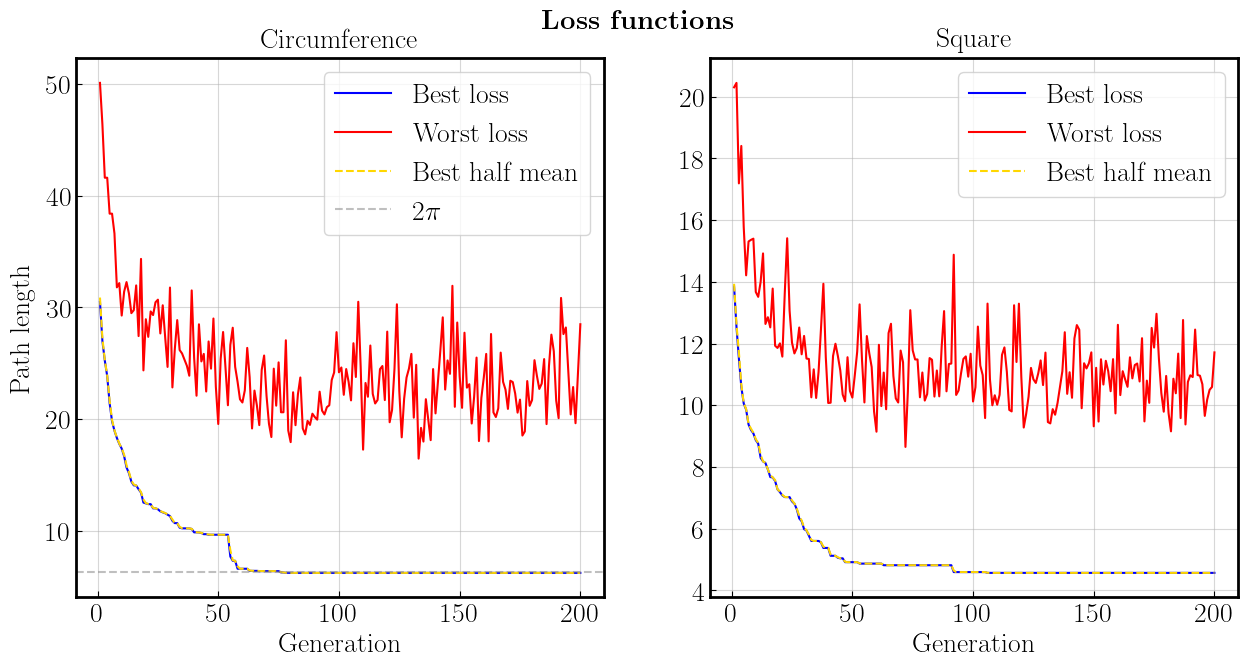

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.suptitle(r'\textbf{Loss functions}', y=0.95)

axs[0].plot(gens, loss_circ[:,0], c='b', label='Best loss')
axs[0].plot(gens, loss_circ[:,-1], c='r', label='Worst loss')
axs[0].plot(gens, np.mean(loss_circ[:,:int(pop_size/2)], axis=1), c='gold', ls='--', label='Best half mean')
axs[0].axhline(2*np.pi, c='grey', ls='--', alpha=0.5, label='$2\pi$')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Path length', labelpad=8)
axs[0].set_title('Circumference', pad=8)
axs[0].legend()

axs[1].plot(gens, loss_square[:,0], c='b', label='Best loss')
axs[1].plot(gens, loss_square[:,-1], c='r', label='Worst loss')
axs[1].plot(gens, np.mean(loss_square[:,:int(pop_size/2)], axis=1), c='gold', ls='--', label='Best half mean')
axs[1].set_xlabel('Generation')
axs[1].set_title('Square', pad=8)
axs[1].legend()

plt.show()

This plots show the value of the loss for the search of the best path through $34$ cities on a circumference (left) and in a square (right) as a function of the number of generations. I plotted the values of the best loss, the worst loss and the average value of the best half of the individuals. In the case of the circumference, the value of the loss is compared with $2\pi$.

We can note that, in both cases, after $100$ generations a good path has been discovered.

**Plot parameters**:
- Number of generations: $200$
- Population size: $300$
- Crossover probability: $0.8$
- Pair permutation probability: $0.3$
- Block permutation probability: $0.1$
- Shift probability: $0.2$
- Inversion probability: $0.2$

I calibrated empirically the probabilities for crossover and other mutations, choosing the ones that gave me the best result. In principle this parameters can vary considering a circumference and a square, but in my case this set gave me excellent results in both scenarios.

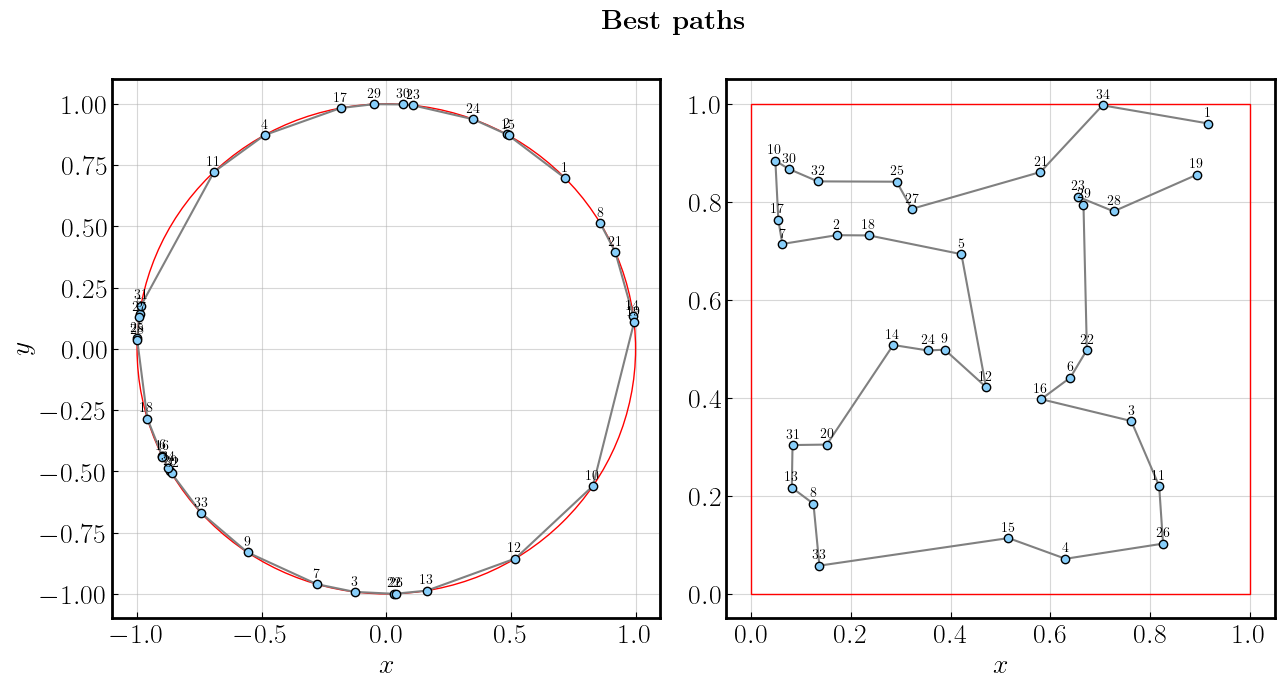

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15,7), gridspec_kw={'wspace':0.12})
fig.suptitle(r'\textbf{Best paths}')

circle = patches.Circle((0, 0), radius=1, edgecolor='r', facecolor='none')
axs[0].add_patch(circle)
ord_x_circ = x_circ[index_circ[-1,:].astype(int)]
ord_y_circ = y_circ[index_circ[-1,:].astype(int)]
axs[0].plot(ord_x_circ, ord_y_circ, color='grey', zorder=1)
axs[0].scatter(x_circ, y_circ, c='lightskyblue', zorder=2)

for i, (x, y) in enumerate(zip(x_circ, y_circ)):
    axs[0].annotate(f'{i_circ[i].astype(int)}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')

square = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
axs[1].add_patch(square)
ord_x_square = x_square[index_square[-1,:].astype(int)]
ord_y_square = y_square[index_square[-1,:].astype(int)]
axs[1].plot(ord_x_square, ord_y_square, color='grey', zorder=1)
axs[1].scatter(x_square, y_square, c='lightskyblue', zorder=2)

for i, (x, y) in enumerate(zip(x_square, y_square)):
    axs[1].annotate(f'{i_square[i].astype(int)}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

axs[1].set_xlabel('$x$')

plt.show()

In this graphic I show a representation of the best paths on a plane, connecting with lines the cities following this paths.

In [7]:
'''
# gif creation not visible on github

def update(frame):
    axs[0].cla()
    axs[1].cla()

    fig.suptitle('Best paths\nGeneration: ' + str(frame + 1), y=1)

    circle = patches.Circle((0, 0), radius=1, edgecolor='r', facecolor='none')
    axs[0].add_patch(circle)
    ord_x_circ = x_circ[index_circ[frame, :].astype(int)]
    ord_y_circ = y_circ[index_circ[frame, :].astype(int)]
    axs[0].plot(ord_x_circ, ord_y_circ, color='grey', zorder=1)
    axs[0].scatter(x_circ, y_circ, c='lightskyblue', zorder=2)

    for i, (x, y) in enumerate(zip(x_circ, y_circ)):
        axs[0].annotate(f'{i_circ[i].astype(int)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$y$')

    square = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
    axs[1].add_patch(square)
    ord_x_square = x_square[index_square[frame, :].astype(int)]
    ord_y_square = y_square[index_square[frame, :].astype(int)]
    axs[1].plot(ord_x_square, ord_y_square, color='grey', zorder=1)
    axs[1].scatter(x_square, y_square, c='lightskyblue', zorder=2)

    for i, (x, y) in enumerate(zip(x_square, y_square)):
        axs[1].annotate(f'{i_square[i].astype(int)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

    axs[1].set_xlabel('$x$')

fig, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'wspace': 0.2})

frames = np.insert(np.linspace(2,199,100).astype(int), 0, 0)
ani = animation.FuncAnimation(fig, update, frames=frames, repeat=True)

HTML(ani.to_jshtml())
'''

'\n# gif creation not visible on github\n\ndef update(frame):\n    axs[0].cla()\n    axs[1].cla()\n\n    fig.suptitle(\'Best paths\nGeneration: \' + str(frame + 1), y=1)\n\n    circle = patches.Circle((0, 0), radius=1, edgecolor=\'r\', facecolor=\'none\')\n    axs[0].add_patch(circle)\n    ord_x_circ = x_circ[index_circ[frame, :].astype(int)]\n    ord_y_circ = y_circ[index_circ[frame, :].astype(int)]\n    axs[0].plot(ord_x_circ, ord_y_circ, color=\'grey\', zorder=1)\n    axs[0].scatter(x_circ, y_circ, c=\'lightskyblue\', zorder=2)\n\n    for i, (x, y) in enumerate(zip(x_circ, y_circ)):\n        axs[0].annotate(f\'{i_circ[i].astype(int)}\', (x, y), textcoords="offset points", xytext=(0, 5), ha=\'center\')\n\n    axs[0].set_xlabel(\'$x$\')\n    axs[0].set_ylabel(\'$y$\')\n\n    square = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor=\'r\', facecolor=\'none\')\n    axs[1].add_patch(square)\n    ord_x_square = x_square[index_square[frame, :].astype(int)]\n    ord_y_square = y_squar

In [8]:
# gif creation visible on github

def gif(gens) :
	files = []

	# prints the best path for all the selected generations
	for i in gens:
		file = '09.1/best_path_' + str(i) + '.png'
		files.append(file)

		fig, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'wspace': 0.2})
		fig.suptitle('Best paths\nGeneration: ' + str(i + 1), y=1)

		circle = patches.Circle((0, 0), radius=1, edgecolor='r', facecolor='none')
		axs[0].add_patch(circle)
		ord_x_circ = x_circ[index_circ[i, :].astype(int)]
		ord_y_circ = y_circ[index_circ[i, :].astype(int)]
		axs[0].plot(ord_x_circ, ord_y_circ, color='grey', zorder=1)
		axs[0].scatter(x_circ, y_circ, c='lightskyblue', zorder=2)

		for j, (x, y) in enumerate(zip(x_circ, y_circ)):
			axs[0].annotate(f'{i_circ[j].astype(int)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

		axs[0].set_xlabel('$x$')
		axs[0].set_ylabel('$y$')

		square = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
		axs[1].add_patch(square)
		ord_x_square = x_square[index_square[i, :].astype(int)]
		ord_y_square = y_square[index_square[i, :].astype(int)]
		axs[1].plot(ord_x_square, ord_y_square, color='grey', zorder=1)
		axs[1].scatter(x_square, y_square, c='lightskyblue', zorder=2)

		for j, (x, y) in enumerate(zip(x_square, y_square)):
			axs[1].annotate(f'{i_square[j].astype(int)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

		axs[1].set_xlabel('$x$')

		plt.savefig(file)
		plt.close()

	# creating the gif
	images = [Image.open(file) for file in files]
	out_path = '09.1/best_path.gif'
	images[0].save(out_path, save_all=True, append_images=images[1:], optimize=False, duration=200, loop=0)

	# removing files
	for image in images :
		image.close()
	for file in files :
		os.remove(file)

In [9]:
gens = np.linspace(2,199,100).astype(int)
gif(gens)

![GIF](09.1/best_path.gif)

With this GIF I show the convergence of the genetic algorithm towards the best path as time passes. It results clear that a very good solution has been discovered after only $100$ generations.

### Observations
- This algorithm converges quickly and gives a good result, but it can be improved, for example by adding different type of selection.
- The present algorithm performs the selection and the mutations at once over all the current population, i.e. the `Selection()` and `Mutations()` methods are called once per generation in the `main.cpp`. I tried also to perform an element-wise evolution, cycling over the population size for every generation and calling each time `Selectionn()` and then `Mutationss()`, but this slowed down the algorithm, so I have commented this methods.